In [4]:
from math import exp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath

from mc_lib.rndm import RndmWrapper
from mc_lib.observable import RealObservable

import ising_builds.cy_ising
import ising_builds.cy_ising_cluster
import ising_builds.exact_ising

from utils import *

In [2]:
def draw_conformation(struct):
    struct = np.array(struct)
    plt.plot(struct[:, 0], struct[:, 1], '-go')
    plt.scatter(struct[0, 0], struct[0, 1])
    plt.scatter(struct[-1, 0], struct[-1, 1])
    plt.grid(True)
    plt.axis('off')
    plt.show()

In [3]:
def generate_test_conf(W, H, N):
    struct = []
    for x in range(W * 2):
        for y in range(H):
            if x % 2 == 0:
                struct.append([x, y])
            else:
                struct.append([x, H-1-y])
                
    for i in range(N):
        offset = i * (W * 2 + 5)
        struct.append([offset+W*2, 0])
        for y in range(H):
            struct.append([offset+W*2+1, y])

        struct.append([offset+W*2+2, H-1])
        for y in range(H):
            struct.append([offset+W*2+3, H-1-y])

        struct.append([offset+W*2+4, 0])
        for x in range(offset+W*2+5, offset+W*2+5+W*2):
            for y in range(H):
                if (x - W*2-5 - offset) % 2 == 0:
                    struct.append([x, y])
                else:
                    struct.append([x, H-1-y])
        
    return struct

In [1]:
def generate_test_conf_short(W, H, N, L):
    """
    generates clusterizd conformation structure
    example: W=2, H=5, N=2, L=3
        ####   ####
        ####   ####
        ####   ####
        ####   ####
        ###########
    
    Parameters
    ----------
    W: int
        half ol the cluster width
    H int
        hight of cluster
    N: int
        number of clusters
    L: np.array
        length of bridges between clusters
    """
    struct = []
    for x in range(W * 2):
        for y in range(H):
            if x % 2 == 0:
                struct.append([x, y])
            else:
                struct.append([x, H-1-y])
                
    for i in range(N):
        offset = i * (W * 2 + L)
        for j in range(L):
            struct.append([offset+W*2+j, 0])
        
        for x in range(offset+W*2+L, offset+W*2+L+W*2):
            for y in range(H):
                if (x - W*2-L - offset) % 2 == 0:
                    struct.append([x, y])
                else:
                    struct.append([x, H-1-y])
        
    return np.array(struct, dtype=int)

In [5]:
c1 = generate_test_conf(5, 20, 1)

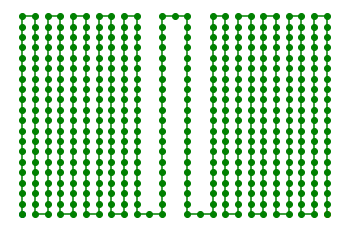

In [6]:
draw_conformation(c1)

In [51]:
nghbr = utils.tabulate_neighbors(np.array(c1))
ene, mag_abs, mag2, mag4, _ = cy_ising_cluster.simulate(nghbr, 1, 10000, 10000)

In [52]:
mag2.mean

0.4172092370366754

In [7]:
c1 = generate_test_conf_short(5, 20, 1, 5)

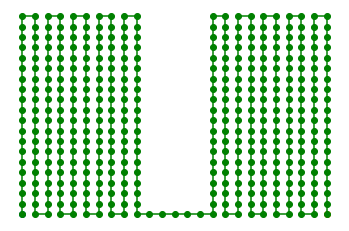

In [8]:
draw_conformation(c1)

In [9]:
plist = []
for L in range(0, 10):
    c1 = generate_test_conf_short(5, 20, 1, L)
    nghbr = utils.tabulate_neighbors(np.array(c1))
    ene, mag_abs, mag2, mag4, _ = cy_ising_cluster.simulate(nghbr, 1, 10000, 10000)
    plist.append(mag2.mean)

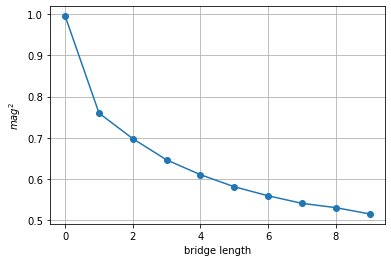

In [25]:
plt.figure()
plt.xlabel('bridge length')
plt.ylabel(r'$mag^2$')
plt.errorbar(range(0, 10), plist, fmt='o-')
plt.grid(True)
plt.show()

In [57]:
c2 = generate_test_conf(5, 10, 2)

223


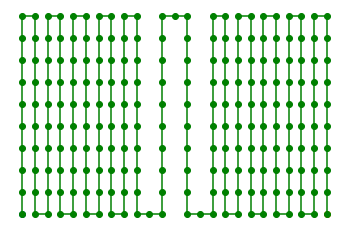

843


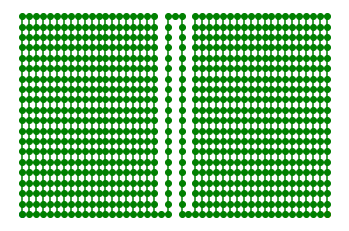

1407


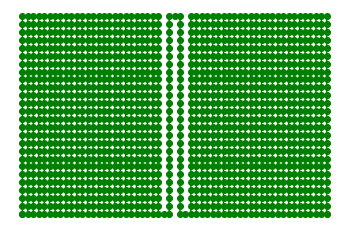

210


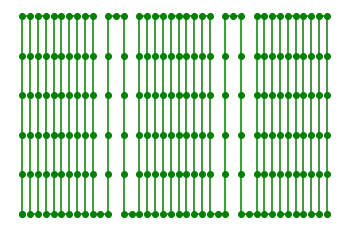

838


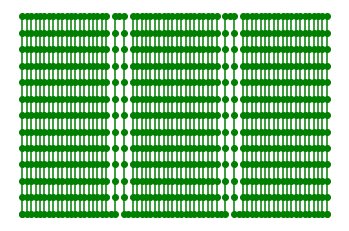

1400


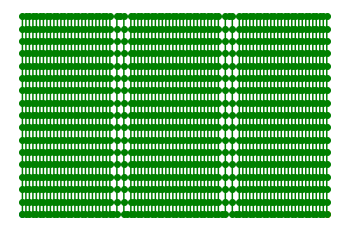

In [60]:
structures = []
for w in (5, 10, 13):
    c = generate_test_conf(w, w*2, 1)
    structures.append(c)
    print(len(c))
    draw_conformation(c)
    
for w in (5, 10, 13):
    c = generate_test_conf(w, w*4 // 3, 2)
    structures.append(c)
    print(len(c))
    draw_conformation(c)

In [63]:
for i in range(len(structures)):
    utils.save_sonformation(structures[i], 'Conformations/CLusterized_conformations/struct_conf_'+str(i)+'.dat')

In [8]:
conformations = utils.load_Conformations_from_dir('Conformations/CLusterized_conformations')

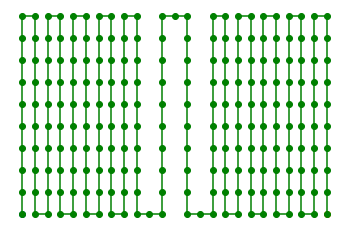

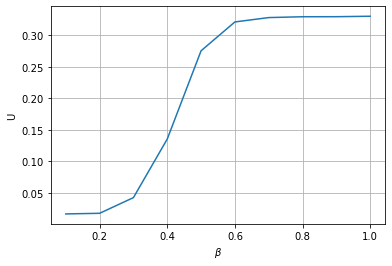

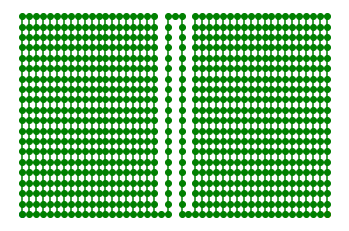

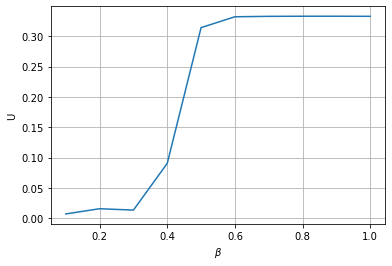

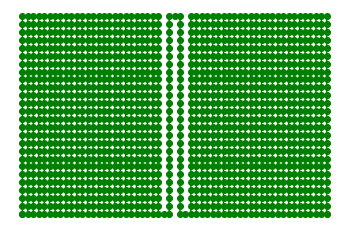

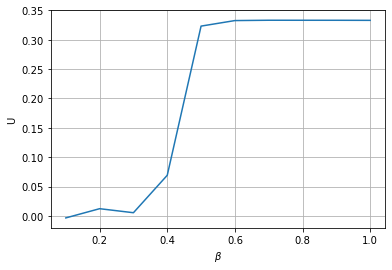

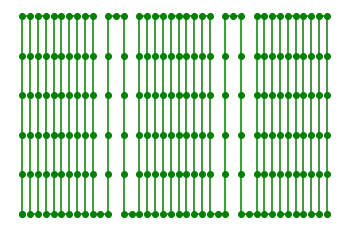

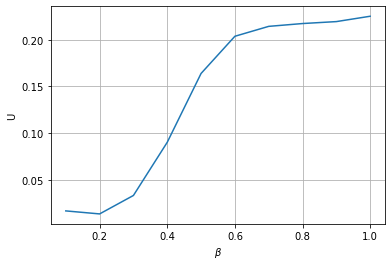

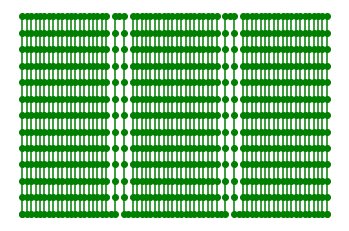

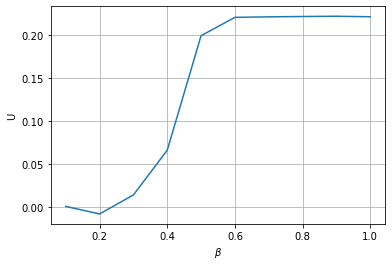

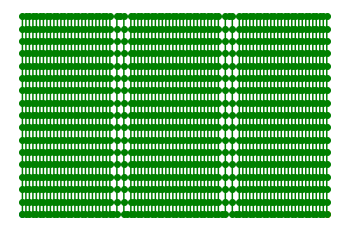

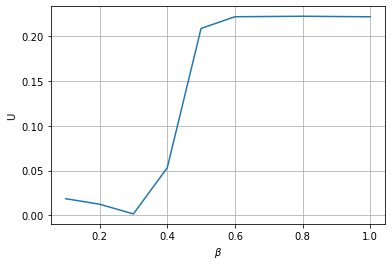

In [11]:
for c in conformations:
    draw_conformation(c.struct)
    plt.figure()
    plt.xlabel(r'$\beta$')
    plt.ylabel('U')
    plt.plot(c.betas, c.U)
    plt.grid(True)
    plt.show()

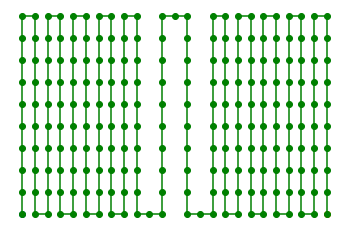

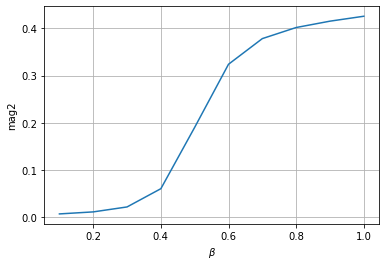

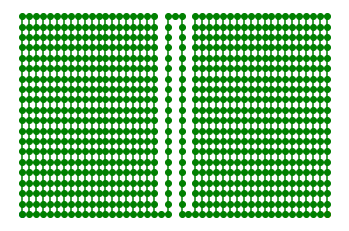

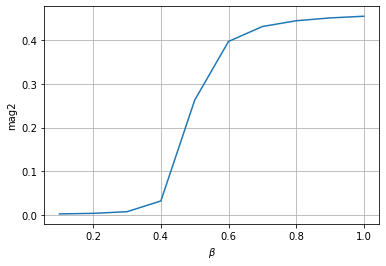

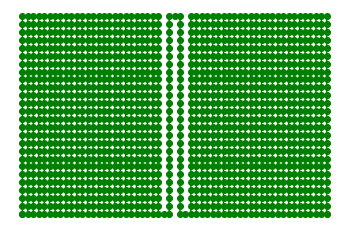

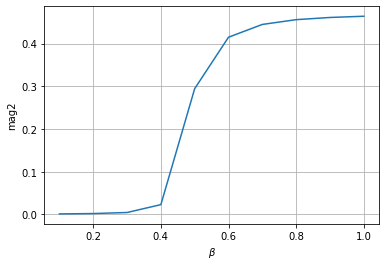

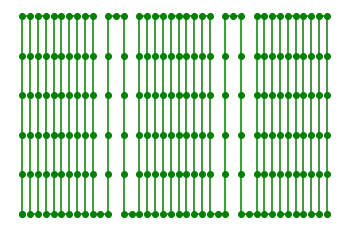

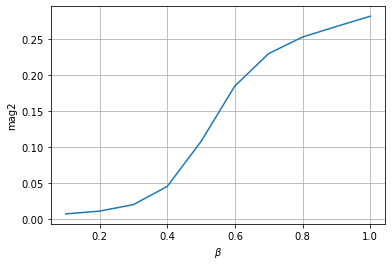

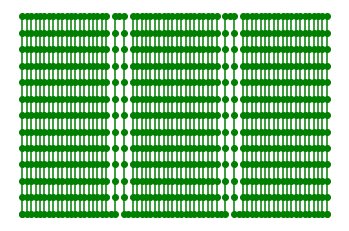

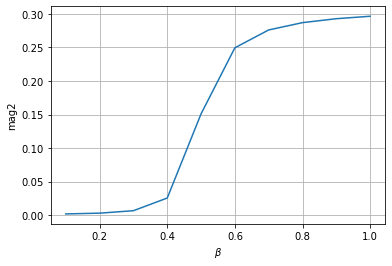

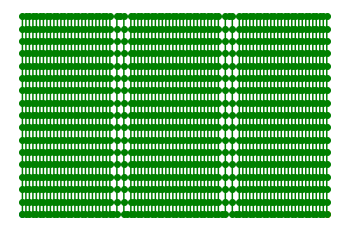

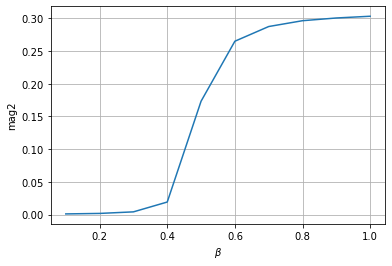

In [13]:
for c in conformations:
    draw_conformation(c.struct)
    plt.figure()
    plt.xlabel(r'$\beta$')
    plt.ylabel('mag2')
    plt.plot(c.betas, [x.mean for x in c.mag2])
    plt.grid(True)
    plt.show()

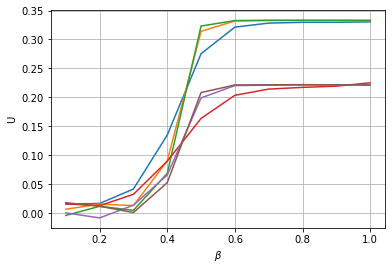

In [13]:
plt.figure()
for c in conformations:
    plt.xlabel(r'$\beta$')
    plt.ylabel('U')
    plt.plot(c.betas, c.U)
    plt.grid(True)

plt.show()

# Generate clusterized conformations sets

In [6]:
import os

In [8]:
L_max = 10
for N in range(2, 5):
    W = 5
    H = 25
    for i in range(4):
        dir_path = f'./Conformations/clusterized/W{W}_H{H}_N{N}'
        if not os.path.exists(dir_path):
            os.mkdir(dir_path)
        with open(f'{dir_path}/num_of_files.txt', 'w') as f:
            f.write(str(L_max) + '\n')
        for L in range(1, L_max+1):
            cluster_500 = generate_cluster_conformation(W, H, N, L)
            save_conformation(cluster_500, f'./Conformations/clusterized/W{W}_H{H}_N{N}/struct_conf_{L-1}.dat')

        if i % 2 == 0:
            W *= 2
        else:
            H *= 2